/tmp/ipykernel_661845/3231902312.py:67: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.9.
  bar.set_hatch(hatch)


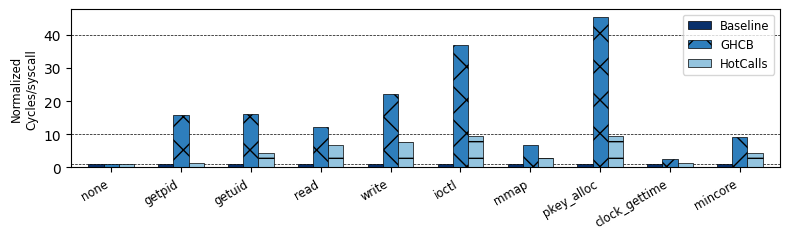

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import re
import numpy as np
# open,7489,17206,0
# close,3070,15341,0
# socket,9281,21560,0
# mprotect,4702,24197,31583
# unmap,5254,25301,0
# none,140,136,139
data = """
Name,Syscall,GHCB,HotCalls
getpid,788,12370,914
getuid,742,11925,3307
read,1335,16243,8944
write,623,13717,4816
ioctl,395,14596,3749
mmap,3348,22765,8958
pkey_alloc,360,16394,3440
clock_gettime,137,323,161
mincore,1926,17494,8543
"""

# df0 = pd.read_table(io.StringIO(data), delimiter=':', skiprows=7, engine='python')
df = pd.read_csv(io.StringIO(data), sep=',')
df.columns = ['Name', 'Baseline', 'GHCB', 'HotCalls']
# Normalize the data
df['GHCB'] = df['GHCB'] / df['Baseline']
df['HotCalls'] = df['HotCalls'] / df['Baseline']
df['Baseline'] = df['Baseline'] / df['Baseline']

# Colors
colors = plt.get_cmap("Blues")

# draw the plot
ax=df.plot(x='Name',
            y=['Baseline', 'GHCB', 'HotCalls'],
            kind='bar', title='',
            edgecolor='black',
            # linestyle="--",
            linewidth=0.5,
            color=[colors(1.0), colors(0.7), colors(0.4)],
            figsize=(8, 2.5),
            width=0.65,
            zorder=2,
            subplots=False)
# Change column names to be more descriptive
# log scale
# plt.yscale('log')
# plot horizontal line at y=1 under the bars
plt.axhline(y=1, color='black', linestyle='--', linewidth=0.5, zorder=1)
plt.axhline(y=10, color='black', linestyle='--', linewidth=0.5, zorder=1)
plt.axhline(y=40, color='black', linestyle='--', linewidth=0.5, zorder=1)
# xticks labels rotation angle and alignment 30 degree
plt.xticks(rotation=30, fontsize='small', ha='right')
# place legend in the bottom right corner
plt.xlabel("")
plt.ylabel("Normalized\nCycles/syscall", fontsize='small')
# fill the bar with the color
# plt.fill_between(df.index, df['Baseline'], df['GHCB-512'], color=colors(0.4), alpha=0.5)
bars = ax.patches
# patterns =('-', '+', 'x','/','//','O','o','\\','\\\\')
# hatches = ''.join(h*len(df) for h in 'x+')
hatches = ''.join(h*len(df) for h in ' x-')
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
# plt.title("Syscall Overhead")
plt.legend(loc='upper right', fontsize='small')
plt.tight_layout()
plt.show()
# save as pdf
f = ax.get_figure()
f.savefig("syscall_overhead.pdf")